https://gitlab.com/ronctli1012/blog1-pretrained-alexnet-and-visualization/-/blob/master/alexnet_main.py?ref_type=heads

from cv2 import cv2 

In [13]:
import os
import torch
import torch.nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F 
import torchvision.utils as utils

import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import argparse


In [14]:
# Define the arguments
class Args:
    def __init__(self):
        self.test_img = 'C:/Users/asche/plants/data/train/images/aesculus californica (spach) nutt/131728.jpg'

# Instantiate the args
opt = Args()

"""
data transforms, for pre-processing the input testing image before feeding into the net
"""
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),             # resize the input to 224x224
    transforms.ToTensor(),              # put the input to tensor format
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # normalize the input
    # the normalization is based on images from ImageNet
])

# obtain the file path of the testing image
test_image_dir = './alexnet_images'
test_image_filepath = os.path.join(test_image_dir, opt.test_img)
#print(test_image_filepath)

# open the testing image
img = Image.open(test_image_filepath)
print("original image's shape: " + str(img.size))

# pre-process the input
transformed_img = data_transforms(img)
print("transformed image's shape: " + str(transformed_img.shape))

original image's shape: (512, 768)
transformed image's shape: torch.Size([3, 224, 224])


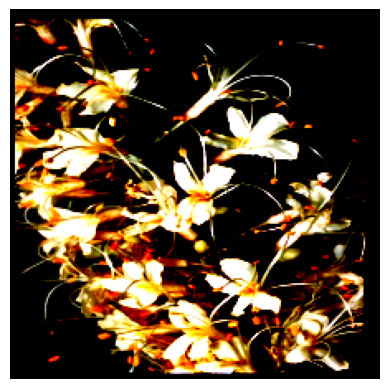

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the tensor image to numpy array
np_img = transformed_img.permute(1, 2, 0).numpy()

# Clip values to [0, 1]
np_img = np.clip(np_img, 0, 1)

# Visualize the image
plt.imshow(np_img)
plt.axis('off')
plt.show()


In [16]:
# form a batch with only one image
batch_img = torch.unsqueeze(transformed_img, 0)
print("image batch's shape: " + str(batch_img.shape))

image batch's shape: torch.Size([1, 3, 224, 224])


In [17]:
# load pre-trained AlexNet model
print("\nfeed the input into the pre-trained alexnet to get the output")
alexnet = models.alexnet(pretrained=True)
# put the model to eval mode for testing
alexnet.eval()

# obtain the output of the model
output = alexnet(batch_img)
print("output vector's shape: " + str(output.shape))


feed the input into the pre-trained alexnet to get the output
output vector's shape: torch.Size([1, 1000])


In [18]:
# Load class names from the file
with open('class_names_ImageNet.txt') as labels:
    classes = [line.strip() for line in labels.readlines()]

# Apply softmax to convert scores to probabilities
probabilities = F.softmax(output, dim=1)[0]

# Get the index of the class with the highest probability
predicted_class_index = torch.argmax(probabilities).item()

# Map the class index to the corresponding label
predicted_label = classes[predicted_class_index]

# Get the probability of the predicted class
predicted_probability = probabilities[predicted_class_index].item()

print("Predicted class:", predicted_label)
print("Probability:", predicted_probability)


Predicted class: pineapple, ananas
Probability: 0.5355279445648193
